In [30]:
import datetime

import pandas as pd
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

In [31]:
df = pd.read_csv("manipulated_pun.csv", sep=";", decimal=',', header='infer')

df.head()


,Data,Ora,PUN
0,20170101,1,53.30
1,20170101,2,52.00
2,20170101,3,51.00
3,20170101,4,47.27
4,20170101,5,45.49


In [32]:
df["Data"] = df["Data"].apply(lambda x: str(x))
df["Data"] = df["Data"].apply(lambda x: datetime.datetime.strptime(x,"%Y%m%d"))
df = df.loc[df['Data'] < '2020-01-01']


In [33]:
df["Ora2"] = pd.to_datetime(df.Ora, unit="h").dt.strftime("%H:%M")
df["Datetime"] = df["Data"].dt.strftime("%Y-%m-%d") + " " + df["Ora2"]


In [34]:
df.tail(30)

,Data,Ora,PUN,Ora2,Datetime
26250,2019-12-30,19,52.44,19:00,2019-12-30 19:00
26251,2019-12-30,20,53.78,20:00,2019-12-30 20:00
26252,2019-12-30,21,48.51,21:00,2019-12-30 21:00
26253,2019-12-30,22,42.94,22:00,2019-12-30 22:00
26254,2019-12-30,23,38.27,23:00,2019-12-30 23:00
26255,2019-12-30,24,37.55,00:00,2019-12-30 00:00
26256,2019-12-31,1,37.55,01:00,2019-12-31 01:00
26257,2019-12-31,2,34.22,02:00,2019-12-31 02:00
26258,2019-12-31,3,30.95,03:00,2019-12-31 03:00
26259,2019-12-31,4,29.80,04:00,2019-12-31 04:00


In [35]:
mask_test = df.index > 26088
mask_train = df.index <= 26088

In [36]:
target = df["PUN"]
df["df24"] = target.shift(24)
target = df["PUN"].iloc[25:]
features = df[["PUN", "df24"]].iloc[25:]


In [37]:
df

,Data,Ora,PUN,Ora2,Datetime,df24
0,2017-01-01,1,53.30,01:00,2017-01-01 01:00,NaN
1,2017-01-01,2,52.00,02:00,2017-01-01 02:00,NaN
2,2017-01-01,3,51.00,03:00,2017-01-01 03:00,NaN
3,2017-01-01,4,47.27,04:00,2017-01-01 04:00,NaN
4,2017-01-01,5,45.49,05:00,2017-01-01 05:00,NaN
...,...,...,...,...,...,...
26275,2019-12-31,20,56.48,20:00,2019-12-31 20:00,53.78
26276,2019-12-31,21,53.24,21:00,2019-12-31 21:00,48.51
26277,2019-12-31,22,50.68,22:00,2019-12-31 22:00,42.94
26278,2019-12-31,23,48.61,23:00,2019-12-31 23:00,38.27


In [38]:
test = df.loc[mask_test]
test.head(25)

# %%
train = df.loc[mask_train]
train


,Data,Ora,PUN,Ora2,Datetime,df24
0,2017-01-01,1,53.30,01:00,2017-01-01 01:00,NaN
1,2017-01-01,2,52.00,02:00,2017-01-01 02:00,NaN
2,2017-01-01,3,51.00,03:00,2017-01-01 03:00,NaN
3,2017-01-01,4,47.27,04:00,2017-01-01 04:00,NaN
4,2017-01-01,5,45.49,05:00,2017-01-01 05:00,NaN
...,...,...,...,...,...,...
26084,2019-12-23,21,40.99,21:00,2019-12-23 21:00,37.29
26085,2019-12-23,22,36.90,22:00,2019-12-23 22:00,31.83
26086,2019-12-23,23,31.96,23:00,2019-12-23 23:00,28.01
26087,2019-12-23,24,18.58,00:00,2019-12-23 00:00,18.67


In [39]:
trainX = train['df24'][24:].values
testX = test['df24'].values
trainY = train['PUN'][24:].values
testY = test["PUN"].values

trainY


# %%
testY.shape


# %%
trainX.shape = ( 26065 , 1)
testX.shape = ( 191 , 1) 
trainY.shape = ( 26065 , 1)
testY.shape = ( 191 , 1)


In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)
trainY = scaler.fit_transform(trainY)


In [41]:
model = tf.keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4,
                                                  verbose=0, mode='auto')
model.fit(trainX, trainY, epochs=50, batch_size=2048, callbacks=[early_stopping])

Epoch 1/50
26065/26065 [==============================] - 0s 9us/sample - loss: 0.0212 - mean_absolute_error: 0.1025
Epoch 2/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0031 - mean_absolute_error: 0.0393
Epoch 3/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0030 - mean_absolute_error: 0.0390
Epoch 4/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0033 - mean_absolute_error: 0.0409
Epoch 5/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0032 - mean_absolute_error: 0.0401
Epoch 6/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0031 - mean_absolute_error: 0.0391
Epoch 7/50
26065/26065 [==============================] - 0s 3us/sample - loss: 0.0033 - mean_absolute_error: 0.0408


In [43]:
predicted = model.predict(testX)
predicted = scaler.inverse_transform(predicted)




In [44]:
predicted_ = pd.DataFrame(predicted)
predicted_.head()


# %%
testY = pd.DataFrame(testY)
testY = testY.reset_index()

# %%

testY.head()

# %%

len(predicted)


# %%

results_vect = pd.concat([testY, predicted_], axis=1)
results_vect.columns = ['Datetime', 'Target', 'Reg']
results_vect 



,Datetime,Target,Reg
0,0,4.62,15.044873
1,1,2.50,13.563227
2,2,2.00,13.010584
3,3,2.50,13.002934
4,4,3.00,13.563227
...,...,...,...
186,186,56.48,52.671547
187,187,53.24,48.578354
188,188,50.68,44.252323
189,189,48.61,40.625309


In [45]:
# %%
predicted_final = predicted_.shift(-24)
len(predicted_final)

# %%

results_vect = pd.concat([testY, predicted_final], axis=1)

# %%
results_vect.columns = ['Datetime', 'Target', 'predicted_final']

3.5672042860385167

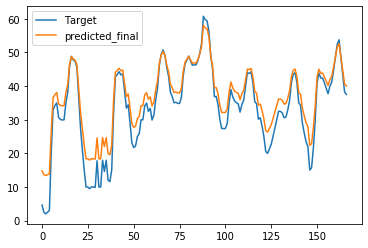

In [46]:
# %%
results_vect.dropna(inplace=True)
results_vect[['Target', 'predicted_final']].plot()


# %%

results_vect['diff'] = results_vect['Target'] - results_vect['predicted_final']


results_vect['diff'] = results_vect['diff'].apply(lambda x: abs(x))

results_vect['diff'].mean()

In [47]:
results_vect['diff2'] = results_vect['diff']/results_vect['Target']

results_vect['diff2'].mean()

0.27182584986295455

In [48]:
results_vect['Target'].mean()

33.491736526946106

In [49]:
results_vect['diff']

0      10.175698
1      11.164479
2      11.411711
3      11.164479
4      10.917192
         ...    
162     1.108453
163     0.068354
164     1.312323
165     2.355309
166     2.516113
Name: diff, Length: 167, dtype: float64

In [50]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
mean_absolute_percentage_error(results_vect['Target'].values, results_vect['predicted_final'].values)

27.18258498629543

In [52]:
predicted2 = model.predict(trainX)
predicted2 = scaler.inverse_transform(predicted2)

In [53]:
predicted_2 = pd.DataFrame(predicted2)
predicted_2.head()

# %%
trainY = train['PUN'][168:].values
trainY.shape = ( 25944, 1)
trainY= pd.DataFrame(trainY)
trainY = trainY.reset_index()

# %%

testY.head()

# %%

len(predicted)


# %%

results_vect2 = pd.concat([trainY, predicted_2], axis=1)
results_vect2.columns = ['Datetime', 'Target', 'Reg']
results_vect2 


ValueError: cannot reshape array of size 25921 into shape (25944,1)

In [ ]:
# %%
predicted_final2 = predicted_2.shift(-24)
len(predicted_final2)

# %%

results_vect2 = pd.concat([trainY, predicted_final2], axis=1)

# %%
results_vect2.columns = ['Datetime', 'Target', 'predicted_final']

In [ ]:
# %%
results_vect2.dropna(inplace=True)
results_vect2[['Target', 'predicted_final']].plot()


# %%

results_vect2['diff'] = results_vect2['Target'] - results_vect2['predicted_final']


results_vect2['diff'] = results_vect2['diff'].apply(lambda x: abs(x))

results_vect2['diff'].mean()

In [ ]:
results_vect2['diff2'] = results_vect2['diff']/results_vect2['Target']

results_vect2['diff2'].mean()